In [2]:
from __future__ import print_function

In [3]:
from collections import defaultdict

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import six

%matplotlib inline


import flotilla


flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects/'
study = flotilla.embark('singlecell_pnm', flotilla_dir=flotilla_dir)

2017-01-06 23:12:12	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm/datapackage.json
2017-01-06 23:12:12	Parsing datapackage to create a Study object
https://s3-us-west-2.amazonaws.com/flotilla-projects/ercc/ERCC_Controls.txt has not been downloaded before.


/home/obotvinnik/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Error loading species hg19 data: HTTP Error 404: Not Found

2017-01-06 23:12:27 	Initializing Study
2017-01-06 23:12:27 	Initializing Predictor configuration manager for Study
2017-01-06 23:12:27	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2017-01-06 23:12:27	Added ExtraTreesClassifier to default predictors
2017-01-06 23:12:27	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2017-01-06 23:12:27	Added ExtraTreesRegressor to default predictors
2017-01-06 23:12:27	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2017-01-06 23:12:27	Added GradientBoostingClassifier to default predictors
2017-01-06 23:12:27	Predictor GradientBoostingRegressor is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>
2017-01-06 23:12:27	Added GradientBoostingRegressor to default predictors
2017-01-06 23:12:27 	Loading metadata
2017-01-06 23:12:27	Loading expression data
2017-0

In [4]:
sns.set(style='whitegrid', context='paper')

In [5]:
figure_folder = 'figures/020_outrigger_rmdup_comparison'
! mkdir -p $figure_folder

In [6]:
folder = '/projects/ps-yeolab/obotvinnik/singlecell_pnms'
original_folder = '{}/outrigger_v2/psi'.format(folder)
rmdup_folder = '{}/csvs_for_paper/outrigger_v2_rmdup/psi'.format(folder)

In [7]:
original_psi = pd.read_csv('{}/outrigger_psi.csv'.format(original_folder), index_col=0)
print('original_psi:', original_psi.shape)
original_psi.head()

original_psi: (50069, 251)


,CVN_01,CVN_02,CVN_03,CVN_04,CVN_05,CVN_06,CVN_07,CVN_08,CVN_09,CVN_11,...,P8_06,P8_07,P8_09,P8_10,P8_11,P8_12,P9_01,P9_02,P9_03,P9_04
event_id,,,,,,,,,,,,,,,,,,,,,
isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0
isoform1=junction:chr10:100190428-100193696:-|isoform2=junction:chr10:100191049-100193696:-@exon:chr10:100190888-100191048:-@junction:chr10:100190428-100190887:-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
isoform1=junction:chr10:100193849-100195391:-|isoform2=junction:chr10:100195172-100195391:-@exon:chr10:100195029-100195171:-@junction:chr10:100193849-100195028:-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,1.0
isoform1=junction:chr10:100193849-100195391:-|isoform2=junction:chr10:100195172-100195391:-@novel_exon:chr10:100195101-100195171:-@junction:chr10:100193849-100195100:-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isoform1=junction:chr10:101163392-101165512:-|isoform2=junction:chr10:101163632-101165512:-@exon:chr10:101163481-101163631:-@junction:chr10:101163392-101163480:-,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN


In [8]:
original_se_summary = pd.read_csv('{}/se/summary.csv'.format(original_folder))
print('original_se_summary:', original_se_summary.shape)
original_se_summary.head()

original_se_summary: (8026478, 7)


,sample_id,event_id,isoform1_junction13,isoform2_junction12,isoform2_junction23,psi,notes
0,CVN_01,isoform1=junction:chr10:100189400-100190327:-|...,0,0,0,NaN,Case 2: Zero observed reads
1,CVN_02,isoform1=junction:chr10:100189400-100190327:-|...,0,0,0,NaN,Case 2: Zero observed reads
2,CVN_03,isoform1=junction:chr10:100189400-100190327:-|...,0,0,0,NaN,Case 2: Zero observed reads
3,CVN_04,isoform1=junction:chr10:100189400-100190327:-|...,0,0,0,NaN,Case 2: Zero observed reads
4,CVN_05,isoform1=junction:chr10:100189400-100190327:-|...,0,0,0,NaN,Case 2: Zero observed reads


In [9]:
original_mxe_summary = pd.read_csv('{}/mxe/summary.csv'.format(original_folder))
print('original_mxe_summary:', original_mxe_summary.shape)
original_mxe_summary.head()

original_mxe_summary: (4540841, 10)


,event_id,incompatible_junction0,incompatible_junction1,isoform1_junction13,isoform1_junction34,isoform2_junction12,isoform2_junction24,notes,psi,sample_id
0,isoform1=junction:chr10:101996727-102003454:-@...,0.0,NaN,0,0,0,0,Case 2: Zero observed reads,NaN,CVN_01
1,isoform1=junction:chr10:101996727-102003454:-@...,0.0,NaN,0,0,0,0,Case 2: Zero observed reads,NaN,CVN_02
2,isoform1=junction:chr10:101996727-102003454:-@...,0.0,NaN,0,0,0,0,Case 2: Zero observed reads,NaN,CVN_03
3,isoform1=junction:chr10:101996727-102003454:-@...,11.0,NaN,0,10,7,1,Case 1: >= 10 reads on junctions that are inco...,NaN,CVN_04
4,isoform1=junction:chr10:101996727-102003454:-@...,0.0,NaN,0,0,0,0,Case 2: Zero observed reads,NaN,CVN_05


In [10]:
rmdup_psi = pd.read_csv('{}/outrigger_psi.csv'.format(rmdup_folder), index_col=0)
print(rmdup_psi.shape)
rmdup_psi.head()

(26453, 299)


,CVN_01_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,CVN_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,CVN_03_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,CVN_04_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,CVN_05_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,CVN_06_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,CVN_07_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,CVN_08_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,CVN_09_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,CVN_10_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,...,P8_06_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,P8_07_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,P8_09_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,P8_10_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,P8_11_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,P8_12_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,P9_01_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.bam,P9_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.bam,P9_03_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.rg.bam,P9_04_R1.fastq.gz.polyATrim.adapterTrim.rmRep.sorted.bam
event_id,,,,,,,,,,,,,,,,,,,,,
isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isoform1=junction:chr10:100190428-100193696:-|isoform2=junction:chr10:100191049-100193696:-@exon:chr10:100190888-100191048:-@junction:chr10:100190428-100190887:-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isoform1=junction:chr10:100193849-100195391:-|isoform2=junction:chr10:100195172-100195391:-@exon:chr10:100195029-100195171:-@junction:chr10:100193849-100195028:-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isoform1=junction:chr10:100193849-100195391:-|isoform2=junction:chr10:100195172-100195391:-@novel_exon:chr10:100195101-100195171:-@junction:chr10:100193849-100195100:-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isoform1=junction:chr10:101163392-101165512:-|isoform2=junction:chr10:101163632-101165512:-@exon:chr10:101163481-101163631:-@junction:chr10:101163392-101163480:-,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
rmdup_psi.notnull().sum().sum()

591778

In [12]:
rmdup_se_summary = pd.read_csv('{}/se/summary.csv'.format(rmdup_folder))
print(rmdup_se_summary.shape)
rmdup_se_summary.head()

(6612086, 7)


,sample_id,event_id,isoform1_junction13,isoform2_junction12,isoform2_junction23,psi,notes
0,CVN_01_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,isoform1=junction:chr10:100189400-100190327:-|...,0.0,0.0,0.0,NaN,Case 2: Zero observed reads
1,CVN_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,isoform1=junction:chr10:100189400-100190327:-|...,0.0,0.0,0.0,NaN,Case 2: Zero observed reads
2,CVN_03_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,isoform1=junction:chr10:100189400-100190327:-|...,0.0,0.0,0.0,NaN,Case 2: Zero observed reads
3,CVN_04_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,isoform1=junction:chr10:100189400-100190327:-|...,0.0,0.0,0.0,NaN,Case 2: Zero observed reads
4,CVN_05_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,isoform1=junction:chr10:100189400-100190327:-|...,0.0,0.0,0.0,NaN,Case 2: Zero observed reads


In [13]:
rmdup_se_summary.query('psi >= 0')

,sample_id,event_id,isoform1_junction13,isoform2_junction12,isoform2_junction23,psi,notes
98,M3_06_R1.fastq.gz.polyATrim.adapterTrim.rmRep....,isoform1=junction:chr10:100189400-100190327:-|...,24.0,0.0,0.0,0.000000,Case 6: Exclusion
155,MSA_24_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,isoform1=junction:chr10:100189400-100190327:-|...,0.0,53.0,47.0,1.000000,Case 7: Inclusion
263,P4_06_R1.fastq.gz.polyATrim.adapterTrim.rmRep....,isoform1=junction:chr10:100189400-100190327:-|...,18.0,0.0,0.0,0.000000,Case 6: Exclusion
284,P7_11_R1.fastq.gz.polyATrim.adapterTrim.rmRep....,isoform1=junction:chr10:100189400-100190327:-|...,11.0,0.0,0.0,0.000000,Case 6: Exclusion
546,P2_03_R1.fastq.gz.polyATrim.adapterTrim.rmRep....,isoform1=junction:chr10:100190428-100193696:-|...,78.0,0.0,0.0,0.000000,Case 6: Exclusion
553,P2_10_R1.fastq.gz.polyATrim.adapterTrim.rmRep....,isoform1=junction:chr10:100190428-100193696:-|...,0.0,142.0,208.0,1.000000,Case 7: Inclusion
561,P4_01_R1.fastq.gz.polyATrim.adapterTrim.rmRep....,isoform1=junction:chr10:100190428-100193696:-|...,29.0,0.0,0.0,0.000000,Case 6: Exclusion
753,MSA_24_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,isoform1=junction:chr10:100193849-100195391:-|...,0.0,25.0,39.0,1.000000,Case 7: Inclusion
845,P2_03_R1.fastq.gz.polyATrim.adapterTrim.rmRep....,isoform1=junction:chr10:100193849-100195391:-|...,65.0,0.0,0.0,0.000000,Case 6: Exclusion
869,P6_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep....,isoform1=junction:chr10:100193849-100195391:-|...,0.0,12.0,11.0,1.000000,Case 7: Inclusion


In [14]:
rmdup_mxe_summary = pd.read_csv('{}/mxe/summary.csv'.format(rmdup_folder))
print(rmdup_mxe_summary.shape)
rmdup_mxe_summary.head()

(1297361, 10)


,event_id,incompatible_junction0,incompatible_junction1,isoform1_junction13,isoform1_junction34,isoform2_junction12,isoform2_junction24,notes,psi,sample_id
0,isoform1=junction:chr10:101996727-102003454:-@...,0.0,NaN,0.0,0.0,0.0,0.0,Case 2: Zero observed reads,NaN,CVN_01_R1.fastq.gz.polyATrim.adapterTrim.rmRep...
1,isoform1=junction:chr10:101996727-102003454:-@...,0.0,NaN,0.0,0.0,0.0,0.0,Case 2: Zero observed reads,NaN,CVN_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep...
2,isoform1=junction:chr10:101996727-102003454:-@...,0.0,NaN,0.0,0.0,0.0,0.0,Case 2: Zero observed reads,NaN,CVN_03_R1.fastq.gz.polyATrim.adapterTrim.rmRep...
3,isoform1=junction:chr10:101996727-102003454:-@...,0.0,NaN,0.0,9.0,0.0,1.0,Case 3: All junctions with insufficient reads,NaN,CVN_04_R1.fastq.gz.polyATrim.adapterTrim.rmRep...
4,isoform1=junction:chr10:101996727-102003454:-@...,0.0,NaN,0.0,0.0,0.0,0.0,Case 2: Zero observed reads,NaN,CVN_05_R1.fastq.gz.polyATrim.adapterTrim.rmRep...


In [15]:
rmdup_summary = pd.concat([rmdup_se_summary, rmdup_mxe_summary], ignore_index=True)
print(rmdup_summary.shape)
rmdup_summary['bam'] = rmdup_summary['sample_id'].copy()
rmdup_summary['sample_id'] = rmdup_summary['sample_id'].map(lambda x: '_'.join(x.split('_')[:2]))
rmdup_summary = rmdup_summary.set_index(['sample_id', 'event_id'])
rmdup_summary.head()

(7909447, 11)


,,incompatible_junction0,incompatible_junction1,isoform1_junction13,isoform1_junction34,isoform2_junction12,isoform2_junction23,isoform2_junction24,notes,psi,bam
sample_id,event_id,,,,,,,,,,
CVN_01,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,CVN_01_R1.fastq.gz.polyATrim.adapterTrim.rmRep...
CVN_02,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,CVN_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep...
CVN_03,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,CVN_03_R1.fastq.gz.polyATrim.adapterTrim.rmRep...
CVN_04,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,CVN_04_R1.fastq.gz.polyATrim.adapterTrim.rmRep...
CVN_05,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,CVN_05_R1.fastq.gz.polyATrim.adapterTrim.rmRep...


### "original" data was run on old version of outrigger that output the wrong cases

In [16]:
original_summary = pd.concat([original_se_summary, original_mxe_summary], ignore_index=True)
original_summary
print(original_summary.shape)
original_summary = original_summary.set_index(['sample_id', 'event_id'])
original_summary.head()

(12567319, 11)


,,incompatible_junction0,incompatible_junction1,isoform1_junction13,isoform1_junction34,isoform2_junction12,isoform2_junction23,isoform2_junction24,notes,psi
sample_id,event_id,,,,,,,,,
CVN_01,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0,NaN,0,0.0,NaN,Case 2: Zero observed reads,NaN
CVN_02,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0,NaN,0,0.0,NaN,Case 2: Zero observed reads,NaN
CVN_03,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0,NaN,0,0.0,NaN,Case 2: Zero observed reads,NaN
CVN_04,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0,NaN,0,0.0,NaN,Case 2: Zero observed reads,NaN
CVN_05,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0,NaN,0,0.0,NaN,Case 2: Zero observed reads,NaN


In [17]:
original_summary.groupby('notes').size()

notes
Case 10a: Isoform1 with sufficient reads but Isoform2 has 1+ junctions with insufficient reads: There are insufficient junction reads       8589
Case 10a: Isoform1 with sufficient reads but Isoform2 has 1+ junctions with insufficient reads: There are sufficient junction reads        42871
Case 11a: Isoform1 has 1+ junction with insufficient reads but Isoform2 with sufficient reads: There are insufficient junction reads        1284
Case 11a: Isoform1 has 1+ junction with insufficient reads but Isoform2 with sufficient reads: There are sufficient junction reads         41958
Case 12a: Isoform1 and Isoform2 each have both sufficient and insufficient junctions: There are insufficient junction reads                 1378
Case 12a: Isoform1 and Isoform2 each have both sufficient and insufficient junctions: There are sufficient junction reads                   1327
Case 1: >= 10 reads on junctions that are incompatible with the annotation                                                  

In [18]:
original_summary['notes_copy'] = original_summary['notes'].copy()
original_summary.groupby('notes_copy').size()

notes_copy
Case 10a: Isoform1 with sufficient reads but Isoform2 has 1+ junctions with insufficient reads: There are insufficient junction reads       8589
Case 10a: Isoform1 with sufficient reads but Isoform2 has 1+ junctions with insufficient reads: There are sufficient junction reads        42871
Case 11a: Isoform1 has 1+ junction with insufficient reads but Isoform2 with sufficient reads: There are insufficient junction reads        1284
Case 11a: Isoform1 has 1+ junction with insufficient reads but Isoform2 with sufficient reads: There are sufficient junction reads         41958
Case 12a: Isoform1 and Isoform2 each have both sufficient and insufficient junctions: There are insufficient junction reads                 1378
Case 12a: Isoform1 and Isoform2 each have both sufficient and insufficient junctions: There are sufficient junction reads                   1327
Case 1: >= 10 reads on junctions that are incompatible with the annotation                                             

#### The "Xb" cases aren't correctly taken care of - the ones with insufficient reads should be "10b" not "10a"

In [19]:
replacer = {'Case 10a: Isoform1 with sufficient reads but Isoform2 has 1+ junctions with insufficient reads: There are insufficient junction reads': 
            'Case 10b: Isoform1 with sufficient reads but Isoform2 has 1+ junctions with insufficient reads: There are insufficient junction reads',
           'Case 11a: Isoform1 has 1+ junction with insufficient reads but Isoform2 with sufficient reads: There are insufficient junction reads':
           'Case 11b: Isoform1 has 1+ junction with insufficient reads but Isoform2 with sufficient reads: There are insufficient junction reads',
           'Case 12a: Isoform1 and Isoform2 each have both sufficient and insufficient junctions: There are insufficient junction reads':
           'Case 12b: Isoform1 and Isoform2 each have both sufficient and insufficient junctions: There are insufficient junction reads'}

original_summary['notes_copy'] = original_summary['notes'].map(lambda x: replacer[x] if x in replacer else x)
original_summary.head()

,,incompatible_junction0,incompatible_junction1,isoform1_junction13,isoform1_junction34,isoform2_junction12,isoform2_junction23,isoform2_junction24,notes,psi,notes_copy
sample_id,event_id,,,,,,,,,,
CVN_01,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0,NaN,0,0.0,NaN,Case 2: Zero observed reads,NaN,Case 2: Zero observed reads
CVN_02,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0,NaN,0,0.0,NaN,Case 2: Zero observed reads,NaN,Case 2: Zero observed reads
CVN_03,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0,NaN,0,0.0,NaN,Case 2: Zero observed reads,NaN,Case 2: Zero observed reads
CVN_04,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0,NaN,0,0.0,NaN,Case 2: Zero observed reads,NaN,Case 2: Zero observed reads
CVN_05,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0,NaN,0,0.0,NaN,Case 2: Zero observed reads,NaN,Case 2: Zero observed reads


In [20]:
original_summary.groupby('notes_copy').size()

notes_copy
Case 10a: Isoform1 with sufficient reads but Isoform2 has 1+ junctions with insufficient reads: There are sufficient junction reads        42871
Case 10b: Isoform1 with sufficient reads but Isoform2 has 1+ junctions with insufficient reads: There are insufficient junction reads       8589
Case 11a: Isoform1 has 1+ junction with insufficient reads but Isoform2 with sufficient reads: There are sufficient junction reads         41958
Case 11b: Isoform1 has 1+ junction with insufficient reads but Isoform2 with sufficient reads: There are insufficient junction reads        1284
Case 12a: Isoform1 and Isoform2 each have both sufficient and insufficient junctions: There are sufficient junction reads                   1327
Case 12b: Isoform1 and Isoform2 each have both sufficient and insufficient junctions: There are insufficient junction reads                 1378
Case 1: >= 10 reads on junctions that are incompatible with the annotation                                             

#### Compared to when I ran outrigger, the cases don't match up to what I have now so I have to rename them

In [21]:
notes_abbrev_renamer = (('Case 6', 'Case 5'),
                                         ('Case 7', 'Case 6'), 
                                         ('Case 8', 'Case 7'), 
                                         ('Case 9', 'Case 8'), 
                                         ('Case 10a', 'Case 9a'), 
                                         ('Case 10b', 'Case 9b'), 
                                         ('Case 11a', 'Case 10a'), 
                                         ('Case 11b', 'Case 10b'),
                                         ('Case 12a', 'Case 11a'),
                                         ('Case 12b', "Case 11b"))

for pattern, replace in notes_abbrev_renamer:
    print(pattern, replace)
    original_summary['notes_copy'] = original_summary['notes_copy'].str.replace(pattern, replace)
original_summary.groupby('notes_copy').size()

Case 6 Case 5
Case 7 Case 6
Case 8 Case 7
Case 9 Case 8
Case 10a Case 9a
Case 10b Case 9b
Case 11a Case 10a
Case 11b Case 10b
Case 12a Case 11a
Case 12b Case 11b


notes_copy
Case 10a: Isoform1 has 1+ junction with insufficient reads but Isoform2 with sufficient reads: There are sufficient junction reads        41958
Case 10b: Isoform1 has 1+ junction with insufficient reads but Isoform2 with sufficient reads: There are insufficient junction reads       1284
Case 11a: Isoform1 and Isoform2 each have both sufficient and insufficient junctions: There are sufficient junction reads                  1327
Case 11b: Isoform1 and Isoform2 each have both sufficient and insufficient junctions: There are insufficient junction reads                1378
Case 1: >= 10 reads on junctions that are incompatible with the annotation                                                               480351
Case 2: Zero observed reads                                                                                                             8920535
Case 3: All junctions with insufficient reads                                                                                

In [22]:
original_summary['notes'] = original_summary['notes_copy']

original_summary.drop('notes_copy', axis=1, inplace=True)

## Add abbreviation of notes/cases

In [23]:
original_summary['notes_abbrev'] = original_summary['notes'].str.split(':').str[0]
original_summary.head()

,,incompatible_junction0,incompatible_junction1,isoform1_junction13,isoform1_junction34,isoform2_junction12,isoform2_junction23,isoform2_junction24,notes,psi,notes_abbrev
sample_id,event_id,,,,,,,,,,
CVN_01,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0,NaN,0,0.0,NaN,Case 2: Zero observed reads,NaN,Case 2
CVN_02,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0,NaN,0,0.0,NaN,Case 2: Zero observed reads,NaN,Case 2
CVN_03,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0,NaN,0,0.0,NaN,Case 2: Zero observed reads,NaN,Case 2
CVN_04,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0,NaN,0,0.0,NaN,Case 2: Zero observed reads,NaN,Case 2
CVN_05,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0,NaN,0,0.0,NaN,Case 2: Zero observed reads,NaN,Case 2


In [24]:
rmdup_summary['notes_abbrev'] = rmdup_summary['notes'].str.split(':').str[0]
rmdup_summary.head()

,,incompatible_junction0,incompatible_junction1,isoform1_junction13,isoform1_junction34,isoform2_junction12,isoform2_junction23,isoform2_junction24,notes,psi,bam,notes_abbrev
sample_id,event_id,,,,,,,,,,,
CVN_01,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,CVN_01_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2
CVN_02,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,CVN_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2
CVN_03,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,CVN_03_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2
CVN_04,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,CVN_04_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2
CVN_05,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,CVN_05_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2


### Write reformatted original summary to csv

In [25]:
original_summary.to_csv('{}/summary_formatted.csv'.format(original_folder))

In [26]:
rmdup_summary.to_csv('{}/summary_formatted.csv'.format(rmdup_folder))

## Join summaries to tidy, tall dataframe

In [27]:
rmdup_summary['dataset'] = 'rmdup'
original_summary['dataset'] = 'original'

In [28]:
summary_tidy = pd.concat([rmdup_summary.reset_index(), original_summary.reset_index()], ignore_index=True)
print(summary_tidy.shape)
summary_tidy.head()

(20476766, 14)


,bam,dataset,event_id,incompatible_junction0,incompatible_junction1,isoform1_junction13,isoform1_junction34,isoform2_junction12,isoform2_junction23,isoform2_junction24,notes,notes_abbrev,psi,sample_id
0,CVN_01_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,Case 2,NaN,CVN_01
1,CVN_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,Case 2,NaN,CVN_02
2,CVN_03_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,Case 2,NaN,CVN_03
3,CVN_04_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,Case 2,NaN,CVN_04
4,CVN_05_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,Case 2,NaN,CVN_05


In [29]:
summary_tidy.query('(psi > 0) & (dataset == "rmdup")').head()

,bam,dataset,event_id,incompatible_junction0,incompatible_junction1,isoform1_junction13,isoform1_junction34,isoform2_junction12,isoform2_junction23,isoform2_junction24,notes,notes_abbrev,psi,sample_id
155,MSA_24_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,0.0,NaN,53.0,47.0,NaN,Case 7: Inclusion,Case 7,1.0,MSA_24
553,P2_10_R1.fastq.gz.polyATrim.adapterTrim.rmRep....,rmdup,isoform1=junction:chr10:100190428-100193696:-|...,NaN,NaN,0.0,NaN,142.0,208.0,NaN,Case 7: Inclusion,Case 7,1.0,P2_10
753,MSA_24_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup,isoform1=junction:chr10:100193849-100195391:-|...,NaN,NaN,0.0,NaN,25.0,39.0,NaN,Case 7: Inclusion,Case 7,1.0,MSA_24
869,P6_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep....,rmdup,isoform1=junction:chr10:100193849-100195391:-|...,NaN,NaN,0.0,NaN,12.0,11.0,NaN,Case 7: Inclusion,Case 7,1.0,P6_02
876,P7_05_R1.fastq.gz.polyATrim.adapterTrim.rmRep....,rmdup,isoform1=junction:chr10:100193849-100195391:-|...,NaN,NaN,0.0,NaN,18.0,11.0,NaN,Case 7: Inclusion,Case 7,1.0,P7_05


In [30]:
case_order = ['Case {}'.format(i+1) for i in range(8)] + ['Case {}{}'.format(i+1, x) for i in range(8, 11) for x in 'ab']
case_order

['Case 1',
 'Case 2',
 'Case 3',
 'Case 4',
 'Case 5',
 'Case 6',
 'Case 7',
 'Case 8',
 'Case 9a',
 'Case 9b',
 'Case 10a',
 'Case 10b',
 'Case 11a',
 'Case 11b']

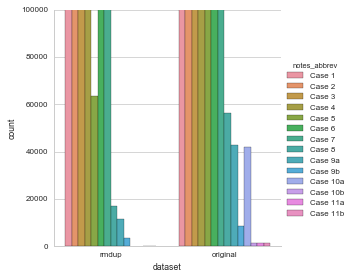

In [31]:
g = sns.factorplot(x='dataset', hue='notes_abbrev', data=summary_tidy, kind='count', hue_order=case_order)
g.savefig('{}/cases_per_dataset_countplot_fullsize.pdf'.format(figure_folder))

ymax = 1e5
g.set(ylim=(0, ymax))
g.savefig('{}/cases_per_dataset_countplot_ymax{}.pdf'.format(figure_folder, ymax))

In [32]:
summary_tidy.head()

,bam,dataset,event_id,incompatible_junction0,incompatible_junction1,isoform1_junction13,isoform1_junction34,isoform2_junction12,isoform2_junction23,isoform2_junction24,notes,notes_abbrev,psi,sample_id
0,CVN_01_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,Case 2,NaN,CVN_01
1,CVN_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,Case 2,NaN,CVN_02
2,CVN_03_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,Case 2,NaN,CVN_03
3,CVN_04_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,Case 2,NaN,CVN_04
4,CVN_05_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,Case 2,NaN,CVN_05


In [33]:
summary_tidy.to_csv('{}/outrigger_summary_original_rmdup_combined_tidy.csv'.format(folder))

In [34]:
compatible_junction_cols = [x for x in summary_tidy if x.startswith('isoform') and 'junction' in x]
compatible_junction_cols

['isoform1_junction13',
 'isoform1_junction34',
 'isoform2_junction12',
 'isoform2_junction23',
 'isoform2_junction24']

In [48]:
incompatible_junction_cols = [x for x in summary_tidy if x.startswith('incompatible') and 'junction' in x]
incompatible_junction_cols

['incompatible_junction0', 'incompatible_junction1']

In [50]:
junction_cols = incompatible_junction_cols + compatible_junction_cols
junction_cols

['incompatible_junction0',
 'incompatible_junction1',
 'isoform1_junction13',
 'isoform1_junction34',
 'isoform2_junction12',
 'isoform2_junction23',
 'isoform2_junction24']

In [35]:
summary_tidy_zero_na = summary_tidy.copy()

mask = summary_tidy_zero_na[junction_cols] > 0
summary_tidy_zero_na[junction_cols] = summary_tidy_zero_na[junction_cols][mask]
summary_tidy_zero_na.head()

,bam,dataset,event_id,incompatible_junction0,incompatible_junction1,isoform1_junction13,isoform1_junction34,isoform2_junction12,isoform2_junction23,isoform2_junction24,notes,notes_abbrev,psi,sample_id
0,CVN_01_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Case 2: Zero observed reads,Case 2,NaN,CVN_01
1,CVN_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Case 2: Zero observed reads,Case 2,NaN,CVN_02
2,CVN_03_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Case 2: Zero observed reads,Case 2,NaN,CVN_03
3,CVN_04_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Case 2: Zero observed reads,Case 2,NaN,CVN_04
4,CVN_05_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,rmdup,isoform1=junction:chr10:100189400-100190327:-|...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Case 2: Zero observed reads,Case 2,NaN,CVN_05


In [52]:
junction_reads_tidy = pd.melt(summary_tidy_zero_na, id_vars=['sample_id', 'event_id', 'dataset'], 
        value_vars=junction_cols).dropna()
print(junction_reads_tidy.shape)
junction_reads_tidy.head()

(14964896, 5)


,sample_id,event_id,dataset,variable,value
6612086,CVN_01,isoform1=junction:chr10:101996727-102003454:-@...,rmdup,incompatible_junction0,0.0
6612087,CVN_02,isoform1=junction:chr10:101996727-102003454:-@...,rmdup,incompatible_junction0,0.0
6612088,CVN_03,isoform1=junction:chr10:101996727-102003454:-@...,rmdup,incompatible_junction0,0.0
6612089,CVN_04,isoform1=junction:chr10:101996727-102003454:-@...,rmdup,incompatible_junction0,0.0
6612090,CVN_05,isoform1=junction:chr10:101996727-102003454:-@...,rmdup,incompatible_junction0,0.0


In [ ]:
g = sns.FacetGrid(junction_reads_tidy, hue='dataset', col='variable', sharex=False, sharey=False)
g.map(sns.distplot, 'value', kde=False)

KeyboardInterrupt: 

ERROR:tornado.general:Uncaught exception, closing connection.
Traceback (most recent call last):
  File "/home/obotvinnik/anaconda/lib/python2.7/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/obotvinnik/anaconda/lib/python2.7/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/obotvinnik/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 260, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/obotvinnik/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 212, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/obotvinnik/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 396, in execute_request
    self._abort_queues()
  File "/home/obotvinnik/anaconda/lib/python2.7/site-packages/ipykernel/kernelbase.py", line 614, in _abort_queues
    self._abort_queue(stream)
  File "/home/obo

## Join summaries to wide dataframe

In [30]:
summary = original_summary.join(rmdup_summary, lsuffix='_original', rsuffix='_rmdup')
print(summary.shape)
summary.head()

(12567319, 24)


,,incompatible_junction0_original,incompatible_junction1_original,isoform1_junction13_original,isoform1_junction34_original,isoform2_junction12_original,isoform2_junction23_original,isoform2_junction24_original,notes_original,psi_original,notes_copy,...,isoform1_junction13_rmdup,isoform1_junction34_rmdup,isoform2_junction12_rmdup,isoform2_junction23_rmdup,isoform2_junction24_rmdup,notes_rmdup,psi_rmdup,bam,notes_abbrev_rmdup,dataset_rmdup
sample_id,event_id,,,,,,,,,,,,,,,,,,,,,
CVN_01,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0,NaN,0,0.0,NaN,Case 2: Zero observed reads,NaN,Case 2: Zero observed reads,...,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,CVN_01_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2,rmdup
CVN_02,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0,NaN,0,0.0,NaN,Case 2: Zero observed reads,NaN,Case 2: Zero observed reads,...,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,CVN_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2,rmdup
CVN_03,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0,NaN,0,0.0,NaN,Case 2: Zero observed reads,NaN,Case 2: Zero observed reads,...,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,CVN_03_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2,rmdup
CVN_04,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0,NaN,0,0.0,NaN,Case 2: Zero observed reads,NaN,Case 2: Zero observed reads,...,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,CVN_04_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2,rmdup
CVN_05,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0,NaN,0,0.0,NaN,Case 2: Zero observed reads,NaN,Case 2: Zero observed reads,...,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,NaN,CVN_05_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2,rmdup


## Write the combined dataframes to one file

In [49]:
folder

'/projects/ps-yeolab/obotvinnik/singlecell_pnms'

In [50]:
summary.to_csv('{}/outrigger_summary_original_rmdup_combined_wide.csv'.format(folder))

In [31]:
summary_fillna = summary.fillna({'psi_original': -0.1, 'psi_rmdup': -0.1})
summary_fillna.head()

,,incompatible_junction0_original,incompatible_junction1_original,isoform1_junction13_original,isoform1_junction34_original,isoform2_junction12_original,isoform2_junction23_original,isoform2_junction24_original,notes_original,psi_original,notes_copy,...,isoform1_junction13_rmdup,isoform1_junction34_rmdup,isoform2_junction12_rmdup,isoform2_junction23_rmdup,isoform2_junction24_rmdup,notes_rmdup,psi_rmdup,bam,notes_abbrev_rmdup,dataset_rmdup
sample_id,event_id,,,,,,,,,,,,,,,,,,,,,
CVN_01,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0,NaN,0,0.0,NaN,Case 2: Zero observed reads,-0.1,Case 2: Zero observed reads,...,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,-0.1,CVN_01_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2,rmdup
CVN_02,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0,NaN,0,0.0,NaN,Case 2: Zero observed reads,-0.1,Case 2: Zero observed reads,...,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,-0.1,CVN_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2,rmdup
CVN_03,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0,NaN,0,0.0,NaN,Case 2: Zero observed reads,-0.1,Case 2: Zero observed reads,...,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,-0.1,CVN_03_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2,rmdup
CVN_04,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0,NaN,0,0.0,NaN,Case 2: Zero observed reads,-0.1,Case 2: Zero observed reads,...,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,-0.1,CVN_04_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2,rmdup
CVN_05,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0,NaN,0,0.0,NaN,Case 2: Zero observed reads,-0.1,Case 2: Zero observed reads,...,0.0,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,-0.1,CVN_05_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2,rmdup


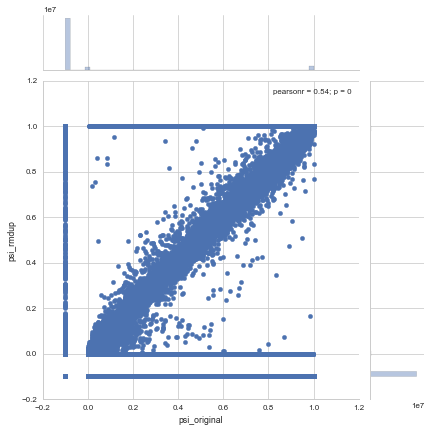

In [32]:
g = sns.jointplot('psi_original', 'psi_rmdup', summary_fillna)

## Facetgrid of rmdup vs original

In [33]:
summary_fillna['either_na'] = "0 <= Psi <= 1"
summary_fillna.loc[summary['psi_rmdup'].isnull(), 'either_na'] = 'rmdup NA'
summary_fillna.loc[summary['psi_original'].isnull(), 'either_na'] = 'original NA'
summary_fillna.head()

,,incompatible_junction0_original,incompatible_junction1_original,isoform1_junction13_original,isoform1_junction34_original,isoform2_junction12_original,isoform2_junction23_original,isoform2_junction24_original,notes_original,psi_original,notes_copy,...,isoform1_junction34_rmdup,isoform2_junction12_rmdup,isoform2_junction23_rmdup,isoform2_junction24_rmdup,notes_rmdup,psi_rmdup,bam,notes_abbrev_rmdup,dataset_rmdup,either_na
sample_id,event_id,,,,,,,,,,,,,,,,,,,,,
CVN_01,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0,NaN,0,0.0,NaN,Case 2: Zero observed reads,-0.1,Case 2: Zero observed reads,...,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,-0.1,CVN_01_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2,rmdup,original NA
CVN_02,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0,NaN,0,0.0,NaN,Case 2: Zero observed reads,-0.1,Case 2: Zero observed reads,...,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,-0.1,CVN_02_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2,rmdup,original NA
CVN_03,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0,NaN,0,0.0,NaN,Case 2: Zero observed reads,-0.1,Case 2: Zero observed reads,...,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,-0.1,CVN_03_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2,rmdup,original NA
CVN_04,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0,NaN,0,0.0,NaN,Case 2: Zero observed reads,-0.1,Case 2: Zero observed reads,...,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,-0.1,CVN_04_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2,rmdup,original NA
CVN_05,isoform1=junction:chr10:100189400-100190327:-|isoform2=junction:chr10:100189647-100190327:-@exon:chr10:100189548-100189646:-@junction:chr10:100189400-100189547:-,NaN,NaN,0,NaN,0,0.0,NaN,Case 2: Zero observed reads,-0.1,Case 2: Zero observed reads,...,NaN,0.0,0.0,NaN,Case 2: Zero observed reads,-0.1,CVN_05_R1.fastq.gz.polyATrim.adapterTrim.rmRep...,Case 2,rmdup,original NA


In [48]:
summary_fillna.shape

(12567319, 25)

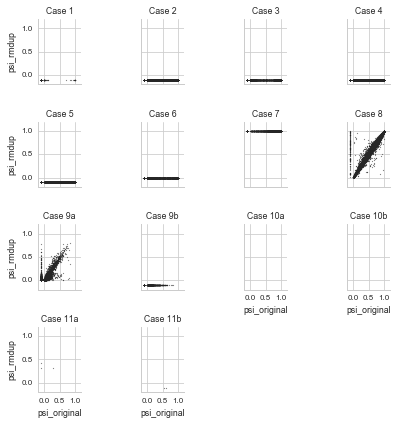

In [34]:
g = sns.FacetGrid(summary_fillna, col='notes_abbrev_rmdup', col_wrap=4, 
#                   hue_order=['0 <= Psi <= 1', 'rmdup NA', 'original NA']
#                   palette=['#262626', ''],
                  col_order=case_order, size=1.5)
g.map(plt.scatter, 'psi_original', 'psi_rmdup', alpha=0.5, color='#262626', rasterized=True, s=1)
g.set_titles('{col_name}')
g.set(xticks=[0, 0.5, 1], yticks=[0, 0.5, 1])
g.savefig('{}/psi_original_vs_rmdup_faceted_by_rmdup_case.pdf'.format(figure_folder), dpi=300)

## Add color for which is NA

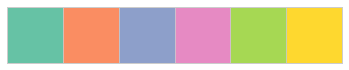

In [35]:
set2 = sns.color_palette('Set2')
sns.palplot(set2)
original_na_color = set2[1]
rmdup_na_color = set2[2]

In [36]:
gridspec_kws = dict(wspace=0.01, hspace=0.05)

/home/obotvinnik/anaconda/lib/python2.7/site-packages/seaborn/axisgrid.py:313: UserWarning: `gridspec_kws` ignored when using `col_wrap`
  warnings.warn("`gridspec_kws` ignored when using `col_wrap`")


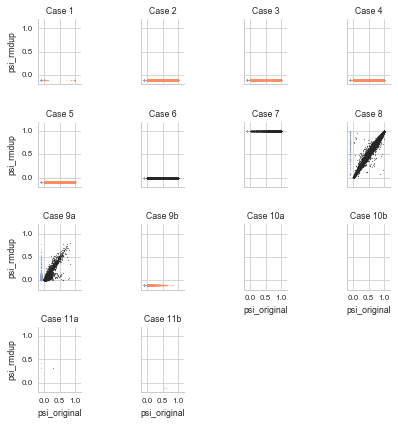

In [37]:
g = sns.FacetGrid(summary_fillna, col='notes_abbrev_rmdup', col_wrap=4, hue='either_na', 
                  hue_order=['0 <= Psi <= 1', 'rmdup NA', 'original NA'],
                  palette=['#262626', original_na_color, rmdup_na_color],
                  col_order=case_order, size=1.5, gridspec_kws=gridspec_kws)
g.map(plt.scatter, 'psi_original', 'psi_rmdup', alpha=0.5, rasterized=True, s=1)
g.set_titles('{col_name}')
g.set(xticks=[0, 0.5, 1], yticks=[0, 0.5, 1])
# g.savefig('{}/outrigger_vs_miso_psi_faceted_by_rmdup_case_hue_na.pdf'.format(figure_folder), dpi=300)

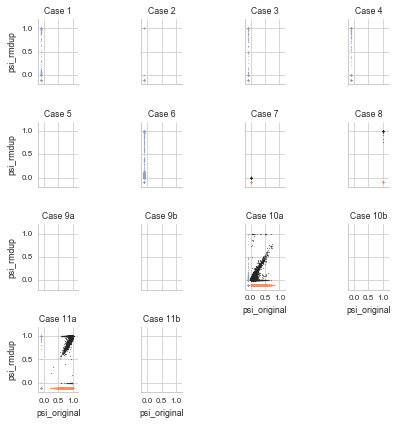

In [38]:
g = sns.FacetGrid(summary_fillna, col='notes_abbrev_original', col_wrap=4, hue='either_na', 
                  hue_order=['0 <= Psi <= 1', 'rmdup NA', 'original NA'],
                  palette=['#262626', original_na_color, rmdup_na_color],
                  col_order=case_order, size=1.5, gridspec_kws=gridspec_kws)
g.map(plt.scatter, 'psi_original', 'psi_rmdup', alpha=0.5, rasterized=True, s=1)
g.set_titles('{col_name}')
g.set(xticks=[0, 0.5, 1], yticks=[0, 0.5, 1])
# g.savefig('{}/outrigger_vs_miso_psi_faceted_by_original_case_hue_na.pdf'.format(figure_folder), dpi=300)

In [39]:
from flotilla.visualize.splicing import lavalamp

In [40]:
rmdup_psi.shape

(26453, 299)

In [41]:
def extract_alternative_constitutive(psi):
    """Separate percent spliced-in matrix to exons that are actually alterantive vs constitutive
    
    Parameters
    ----------
    psi : pandas.DataFrame
        This is a (samples, features) shaped dataframe
    
    Returns
    -------
    alternative, constitutively0, constitutively1 : pandas.DataFrame
        Slices of the input dataframe that are alternative or constitutive
    """

    notnull = psi.notnull()

    constitutively0 = (psi == 0)[notnull].all()
    constitutively1 = (psi == 1)[notnull].all()
    print(constitutively1.sum())
    alternative = psi.columns[~constitutively0 & ~constitutively1]

    constitutively0 = constitutively0[constitutively0].index
    constitutively1 = constitutively1[constitutively1].index

    return psi[alternative], psi[constitutively0], psi[constitutively1]


rmdup_alternative, rmdup_constitutively0, rmdup_constitutively1 = extract_alternative_constitutive(rmdup_psi.T)
print(rmdup_alternative.shape)
print(rmdup_constitutively0.shape)
print(rmdup_constitutively1.shape)

6334
(299, 15632)
(299, 7367)
(299, 6334)


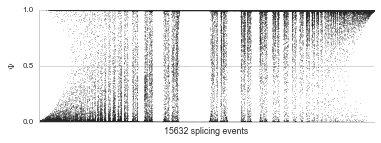

In [42]:
fig, ax = plt.subplots(figsize=(6, 2))
lavalamp(rmdup_alternative, ax=ax, markersize=1, color='#262626')
# fig.savefig('{}/lavalamp_rmdup.pdf'.format(figure_folder), dpi=300)

In [43]:
original_alternative, original_constitutively0, original_constitutively1 = extract_alternative_constitutive(original_psi.T)
print(original_alternative.shape)
print(original_constitutively0.shape)
print(original_constitutively1.shape)

11904
(251, 34982)
(251, 11435)
(251, 11904)


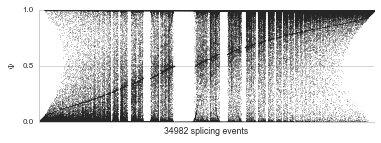

In [44]:
fig, ax = plt.subplots(figsize=(6, 2))
lavalamp(original_alternative, ax=ax, markersize=1, color='#262626')
# fig.savefig('{}/lavalamp_original.pdf'.format(figure_folder), dpi=300)